# Load Preprocessed Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read the weekly sales data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/processed_sales.csv")

# Convert the 'date' column to datetime object and Set the 'date' column as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head(4)  # Display the first 4 rows of the DataFrame

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second
date,,,,,,,,,,,,,,,,
2015-01-01,1,1,hawaiian_m,1,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,1,11,38,36
2015-01-01,104,42,peppr_salami_m,1,16.50,16.50,M,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza,2015,1,1,17,28,9
2015-01-01,105,43,ckn_alfredo_m,1,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,1,1,17,38,34
2015-01-01,106,43,ital_supr_m,1,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1,17,38,34


In [2]:
import holidays

# Get a list of US holidays for the year 2015
ind_holidays = holidays.IN(years=[2015])

# Convert the holidays to a DataFrame-friendly format
holiday_dates = pd.to_datetime(list(ind_holidays.keys()))

# Adding these holidays to the DataFrame
df['holiday'] = df.index.isin(holiday_dates)

# Create a new column 'day_of_week' representing the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df.index.dayofweek

# Compute the week number
df.reset_index(inplace=True)
df["week_number"] = df['date'].dt.isocalendar().week
df.head()

,date,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second,holiday,day_of_week,week_number
0,2015-01-01,1,1,hawaiian_m,1,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,1,11,38,36,False,3,1
1,2015-01-01,104,42,peppr_salami_m,1,16.50,16.50,M,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza,2015,1,1,17,28,9,False,3,1
2,2015-01-01,105,43,ckn_alfredo_m,1,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,1,1,17,38,34,False,3,1
3,2015-01-01,106,43,ital_supr_m,1,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1,17,38,34,False,3,1
4,2015-01-01,107,43,peppr_salami_l,1,20.75,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza,2015,1,1,17,38,34,False,3,1


# Exploratory Data Analysis (EDA)

In [3]:
df.shape    # shape of the dataframe

(48620, 20)

In [4]:
df.info()   # dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               48620 non-null  datetime64[ns]
 1   pizza_id           48620 non-null  int64         
 2   order_id           48620 non-null  int64         
 3   pizza_name_id      48620 non-null  object        
 4   quantity           48620 non-null  int64         
 5   unit_price         48620 non-null  float64       
 6   total_price        48620 non-null  float64       
 7   pizza_size         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  pizza_name         48620 non-null  object        
 11  Year               48620 non-null  int64         
 12  Month              48620 non-null  int64         
 13  Day                48620 non-null  int64         
 14  Hour  

In [5]:
df.describe()   # statistical description of the dataframe

,date,pizza_id,order_id,quantity,unit_price,total_price,Year,Month,Day,Hour,Minute,Second,day_of_week,week_number
count,48620,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.0
mean,2015-06-28 21:56:43.932537856,24310.500000,10701.479761,1.019622,16.494132,16.821474,2015.0,6.432476,15.480317,15.911806,29.654936,29.524949,3.003209,26.558741
min,2015-01-01 00:00:00,1.000000,1.000000,1.000000,9.750000,9.750000,2015.0,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,1.0
25%,2015-03-30 00:00:00,12155.750000,5337.000000,1.000000,12.750000,12.750000,2015.0,3.000000,8.000000,13.000000,15.000000,15.000000,1.000000,14.0
50%,2015-06-28 00:00:00,24310.500000,10682.500000,1.000000,16.500000,16.500000,2015.0,6.000000,15.000000,16.000000,30.000000,30.000000,3.000000,26.0
75%,2015-09-29 00:00:00,36465.250000,16100.000000,1.000000,20.250000,20.500000,2015.0,9.000000,23.000000,18.000000,45.000000,44.000000,5.000000,40.0
max,2015-12-31 00:00:00,48620.000000,21350.000000,4.000000,35.950000,83.000000,2015.0,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000,53.0
std,NaN,14035.529381,6180.119770,0.143077,3.621789,4.437398,0.0,3.435386,8.789912,3.149836,17.310959,17.235792,1.949703,14.996063


In [6]:
# Aggregate weekly sales
weekly_sales = df.groupby(['pizza_name_id', 'week_number'], observed=False).agg({'quantity': 'sum', 'holiday': 'any'})
weekly_sales = pd.DataFrame(weekly_sales).reset_index()

# # Create a new 'date' column assuming week 1 starts on 2015-01-01
weekly_sales['date'] = pd.to_datetime('2015-01-01') + pd.to_timedelta(weekly_sales['week_number'] - 1, unit='W')

# Display result
weekly_sales.head()

,pizza_name_id,week_number,quantity,holiday,date
0,bbq_ckn_l,1,12,False,2015-01-01
1,bbq_ckn_l,2,25,False,2015-01-08
2,bbq_ckn_l,3,24,False,2015-01-15
3,bbq_ckn_l,4,15,False,2015-01-22
4,bbq_ckn_l,5,27,True,2015-01-29


# Visualization

**Weekly Sales Trend (Line Chart)**

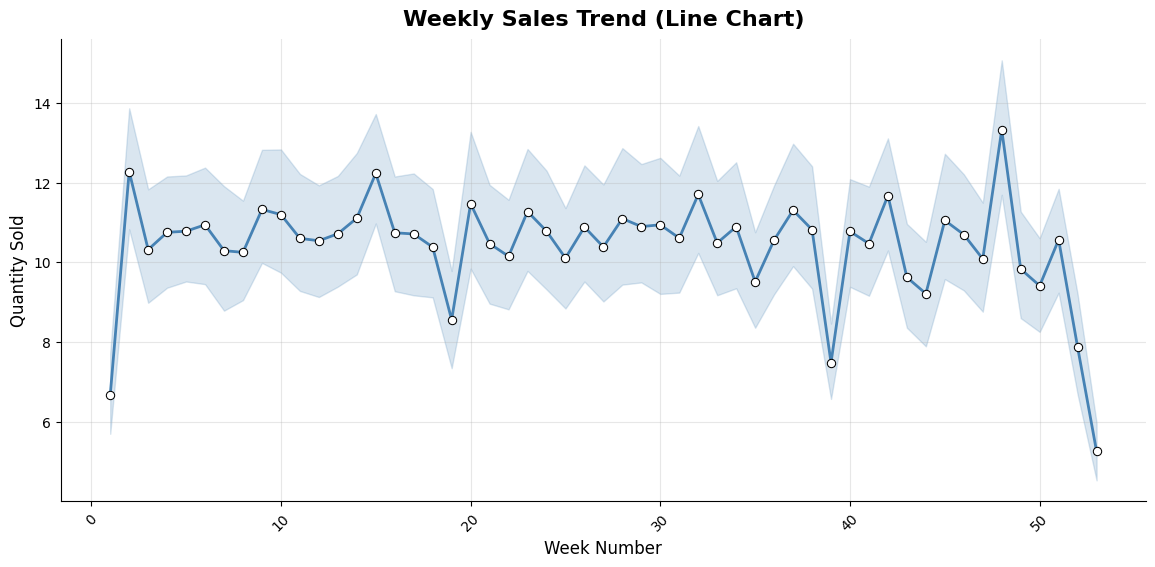

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(14, 6))

# Plot the line chart
sns.lineplot(x='week_number', y='quantity', data=weekly_sales, marker='o', color='steelblue',
    linewidth=2, markeredgecolor='black', markerfacecolor='white', markersize=6)

# Add title and labels with improved styling
plt.title('Weekly Sales Trend (Line Chart)', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

sns.despine()   # Remove top and right spines for a cleaner look
plt.grid(alpha=0.3)   # Add a grid with reduced alpha
plt.show()  # Show the plot

**Weekly Sales Trend (Bar Chart)**

<ipython-input-8-e0658b3566e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week_number', y='quantity', data=weekly_sales, palette='Blues_d')


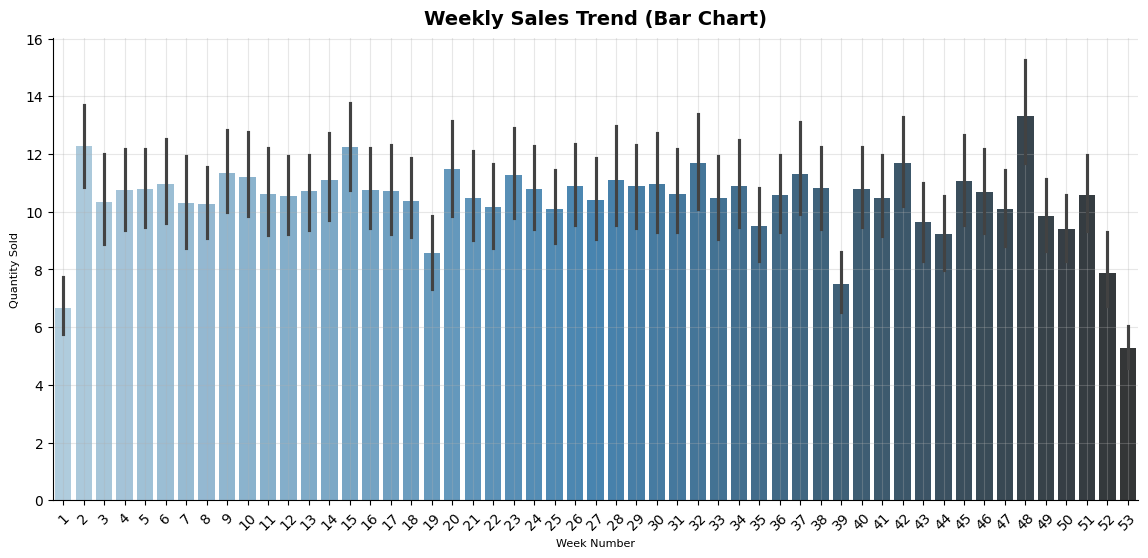

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure with a specific size
plt.figure(figsize=(14, 6))

# Plot the bar chart using Seaborn's barplot
sns.barplot(x='week_number', y='quantity', data=weekly_sales, palette='Blues_d')

# Set the title and axis labels with improved styling
plt.title('Weekly Sales Trend (Bar Chart)', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Week Number', fontsize=8)
plt.ylabel('Quantity Sold', fontsize=8)

plt.xticks(rotation=45)
sns.despine()
plt.grid(alpha=0.3)
plt.show()

**Heatmap**

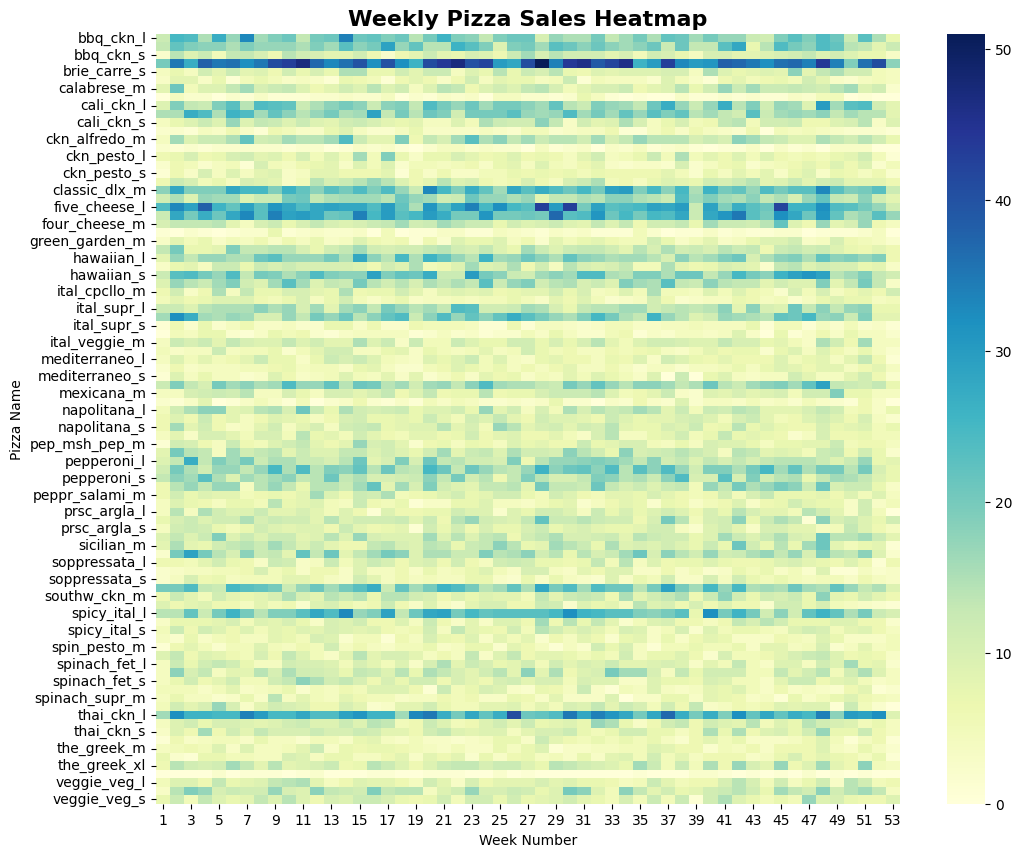

In [9]:
heatmap_data = weekly_sales.pivot_table(
    index='pizza_name_id',
    columns='week_number',
    values='quantity',
    fill_value=0,  # Fill missing with 0 or another appropriate value
    observed=False
)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Weekly Pizza Sales Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Week Number")
plt.ylabel("Pizza Name")
plt.show()

**Moving Average / Rolling Window**

- Computes the `rolling mean (moving average)` of the quantity column using a `window` size of `2`.
- The `.rolling(window=2)` function creates a rolling window of size `2`, meaning each row (except the first one) will be the average of the current and previous week's sales.
- The `.mean()` function calculates the average of values within each rolling window.
- The `marker='o'` ensures data points are visible.

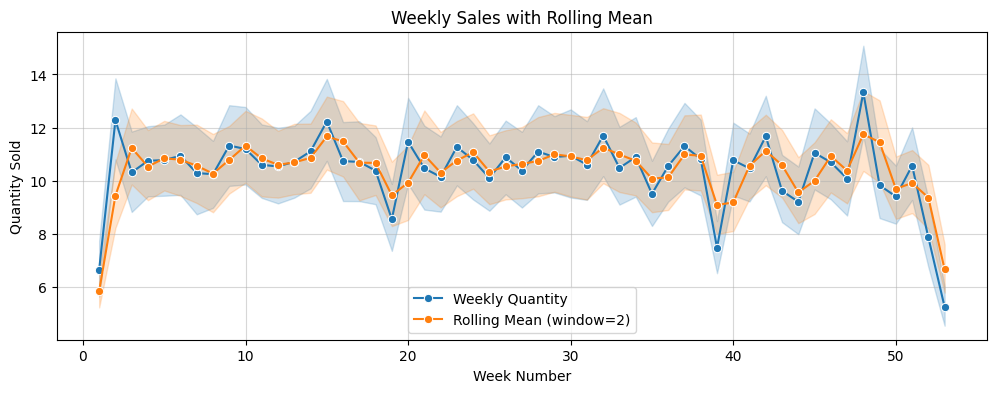

In [10]:
rolling_mean = weekly_sales.copy()
rolling_mean['rolling_mean'] = rolling_mean['quantity'].rolling(window=2).mean()    # Calculate rolling mean

plt.figure(figsize=(12, 4))
sns.lineplot(x='week_number', y='quantity', data=rolling_mean, marker='o', label='Weekly Quantity')
sns.lineplot(x='week_number', y='rolling_mean', data=rolling_mean, marker='o', label='Rolling Mean (window=2)')
plt.title('Weekly Sales with Rolling Mean')
plt.xlabel('Week Number')
plt.ylabel('Quantity Sold')
plt.grid(alpha=0.5)
plt.show()

**Top 10 Pizzas by Total Quantity Used**

**Explanation**:
1. Group and sum: We use `groupby('pizza_name_id')['quantity'].sum()` to get total sales per pizza ID.
2. Sort and slice: `sort_values(ascending=False).head(10)` gives the top 10 pizza IDs by total quantity.
3. Plot: `plot(kind='bar')` creates a simple bar chart of the top 10 pizzas.
4. Styling: We add titles, labels, and adjust figure size for clarity.

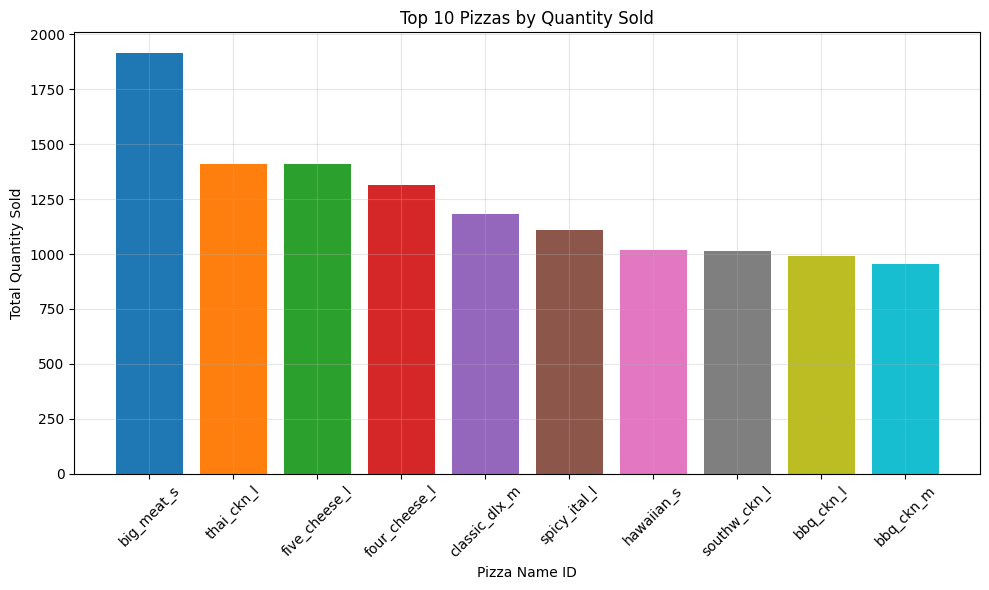

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Group by pizza_name_id and sum the quantities
total_quantities = weekly_sales.groupby('pizza_name_id', observed=False)['quantity'].sum()

# 2. Sort the values in descending order and select the top 10
top_10_pizzas = total_quantities.sort_values(ascending=False).head(10)

# 3. Generate a list of distinct colors for each bar using a colormap (e.g., 'tab10')
cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in range(len(top_10_pizzas))]

# 3. Create a bar plot
plt.figure(figsize=(10, 6))
# top_10_pizzas.plot(kind='bar', color='skyblue')
plt.bar(top_10_pizzas.index, top_10_pizzas.values, color=colors)

# 4. Customize the plot
plt.title('Top 10 Pizzas by Quantity Sold')
plt.xlabel('Pizza Name ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # rotate x-axis labels if needed

# 5. Show the plot
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

### saving the cleaned data to a csv file

In [ ]:
weekly_sales.to_csv('weekly_sales.csv')     # Save the weekly sales data to a CSV file
df.to_csv('processed_sales.csv')            # Save the processed sales data to a CSV file